In [62]:
# data manipulation
import pandas as pd
import numpy as np

# pre processing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklvq import GMLVQ

# metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# plotting
import matplotlib.pyplot as plt

# saving
import joblib

In [63]:
X_train = joblib.load('data/X_train_preprocessed.pkl')
X_test = joblib.load('data/X_test_preprocessed.pkl')
y_train = joblib.load('data/y_train_preprocessed.pkl')
y_test = joblib.load('data/y_test_preprocessed.pkl')

In [64]:
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

In [65]:
lvq = GMLVQ()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [67]:
param_grid = {
    "solver_type": ["steepest-gradient-descent", "waypoint-gradient-descent"],
    "distance_type": ["adaptive-squared-euclidean"],
    "activation_type": ["sigmoid"],
    "solver_params": [{"step_size": s} for s in [0.1, 0.01, 0.001]],
    "activation_params": [{"beta": b} for b in [1, 2, 3]]
}
# solvers_types = [
#     "steepest-gradient-descent",
#     "waypoint-gradient-descent",
# ]

# distance_types = ["adaptive-squared-euclidean"]

# solver_params_list = [{"step_size": s} for s in [0.1, 0.01, 0.001, 0.0001]]

# activation_params_list = [{"beta": b} for b in [1, 2, 3]]

# param_grid = [
#     {
#         "solver_type": ["steepest-gradient-descent", "waypoint-gradient-descent"],
#         "distance_type": ["adaptive-squared-euclidean"],
#         "activation_type": ["identity"],
#         "solver_params": solver_params_list,
#     },
#     {
#         "solver_type": ["steepest-gradient-descent", "waypoint-gradient-descent"],
#         "distance_type": ["adaptive-squared-euclidean"],
#         "activation_type": ["sigmoid"],
#         "activation_params": activation_params_list,
#         "solver_params": solver_params_list
#     },
# ]

In [68]:
def train_grid_search(X, y, estimator, grid):
    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=grid,
        cv=skf,
        scoring=scoring,
        refit='f1_macro',
        n_jobs=-1,
        return_train_score=True,
        verbose=1,
    )

    grid_search.fit(X, y)

    return grid_search

In [69]:
def get_results(r_search):
    results = pd.DataFrame(r_search.cv_results_)
    
    results = results[
        [
            'mean_fit_time', 'mean_score_time', 'param_solver_type', 'param_distance_type', 'param_activation_type',
            'param_activation_params', 'param_solver_params', 'mean_train_accuracy', 'mean_test_accuracy', 'rank_test_accuracy', 
            'mean_train_precision_macro', 'mean_test_precision_macro', 'rank_test_precision_macro', 'mean_train_recall_macro', 
            'mean_test_recall_macro', 'rank_test_recall_macro', 'mean_train_f1_macro', 'mean_test_f1_macro', 'rank_test_f1_macro'
        ]
    ]

    results = results.sort_values(by='mean_test_f1_macro', ascending=False)
    return results

In [70]:
pd.set_option('display.max_columns', None)

In [71]:
grid_search = train_grid_search(X_train, y_train, lvq, param_grid)
results = get_results(grid_search)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


c:\Users\brend\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\brend\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\brend\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\brend\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_

In [72]:
results.head(10)

,mean_fit_time,mean_score_time,param_solver_type,param_distance_type,param_activation_type,param_activation_params,param_solver_params,mean_train_accuracy,mean_test_accuracy,rank_test_accuracy,mean_train_precision_macro,mean_test_precision_macro,rank_test_precision_macro,mean_train_recall_macro,mean_test_recall_macro,rank_test_recall_macro,mean_train_f1_macro,mean_test_f1_macro,rank_test_f1_macro
0,262.317166,0.105816,steepest-gradient-descent,adaptive-squared-euclidean,sigmoid,{'beta': 1},{'step_size': 0.1},NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1
1,34.124041,0.107114,waypoint-gradient-descent,adaptive-squared-euclidean,sigmoid,{'beta': 1},{'step_size': 0.1},NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1
2,276.931718,0.102693,steepest-gradient-descent,adaptive-squared-euclidean,sigmoid,{'beta': 1},{'step_size': 0.01},NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1
3,33.766686,0.111024,waypoint-gradient-descent,adaptive-squared-euclidean,sigmoid,{'beta': 1},{'step_size': 0.01},NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1
4,270.947335,0.105841,steepest-gradient-descent,adaptive-squared-euclidean,sigmoid,{'beta': 1},{'step_size': 0.001},NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1
5,33.562374,0.101804,waypoint-gradient-descent,adaptive-squared-euclidean,sigmoid,{'beta': 1},{'step_size': 0.001},NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1
6,274.752394,0.098377,steepest-gradient-descent,adaptive-squared-euclidean,sigmoid,{'beta': 2},{'step_size': 0.1},NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1
7,33.674624,0.100186,waypoint-gradient-descent,adaptive-squared-euclidean,sigmoid,{'beta': 2},{'step_size': 0.1},NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1
8,271.649471,0.094956,steepest-gradient-descent,adaptive-squared-euclidean,sigmoid,{'beta': 2},{'step_size': 0.01},NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1
9,33.504095,0.097046,waypoint-gradient-descent,adaptive-squared-euclidean,sigmoid,{'beta': 2},{'step_size': 0.01},NaN,NaN,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,1


In [74]:
def view_test_metrics(train_metrics: bool, filter_top_n: int, results_df: pd.DataFrame):
    if train_metrics:
        metrics = [
            "mean_train_accuracy", "mean_test_accuracy",
            "mean_train_precision_macro", "mean_test_precision_macro",
            "mean_train_recall_macro", "mean_test_recall_macro",
            "mean_train_f1_macro", "mean_test_f1_macro"
        ]
    else:
        metrics = [
            "mean_test_accuracy",
            "mean_test_precision_macro",
            "mean_test_recall_macro",
            "mean_test_f1_macro"
        ]

    if filter_top_n:
        results_df = results_df.nsmallest(filter_top_n, "rank_test_f1_macro")

    results_df = results_df.copy()
    results_df['param_solver_params'] = results_df['param_solver_params'].astype(str)
    results_df['param_activation_params'] = results_df['param_activation_params'].astype(str)

    param_cols = ["param_solver_type", "param_distance_type", "param_activation_type", "param_activation_params", "param_solver_params"]
    plot_df = results_df.melt(
        id_vars=param_cols,      # keep these columns "as is"
        value_vars=metrics,      # the columns we want to "unpivot"
        var_name="metric",       # new column with the metric name
        value_name="score"       # new column with the metric value
    )

    plt.figure(figsize=(12, 8))
    
    # Group the data by parameter combination and create a list of groups.
    groups = list(plot_df.groupby(param_cols))
    # Create a color palette with as many colors as there are groups.
    colors = plt.cm.tab10(np.linspace(0, 1, len(groups)))
    
    for i, (combo, group) in enumerate(groups):
        group = group.sort_values("metric")
        # Create a label for the model using its parameters.
        label_str = ", ".join(f"{col}={val}" for col, val in zip(param_cols, combo))
        # Pick the color for this group.
        color = colors[i]
        
        # Separate training and test metrics
        train_group = group[group["metric"].str.startswith("mean_train")]
        test_group = group[~group["metric"].str.startswith("mean_train")]
        
        # Plot training metrics with the same color
        if not train_group.empty:
            plt.plot(train_group["metric"], train_group["score"], 
                     marker='x', linestyle='dashed', alpha=0.7,
                     color=color,
                     label=label_str + " (train)")
        # Plot test metrics with the same color
        if not test_group.empty:
            plt.plot(test_group["metric"], test_group["score"], 
                     marker='o', linestyle='solid', alpha=0.7,
                     color=color,
                     label=label_str + " (test)")

    plt.xlabel("Metric")
    plt.ylabel("Score")
    plt.title("Comparison of Mean Test Metrics")
    plt.xticks(rotation=45)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()

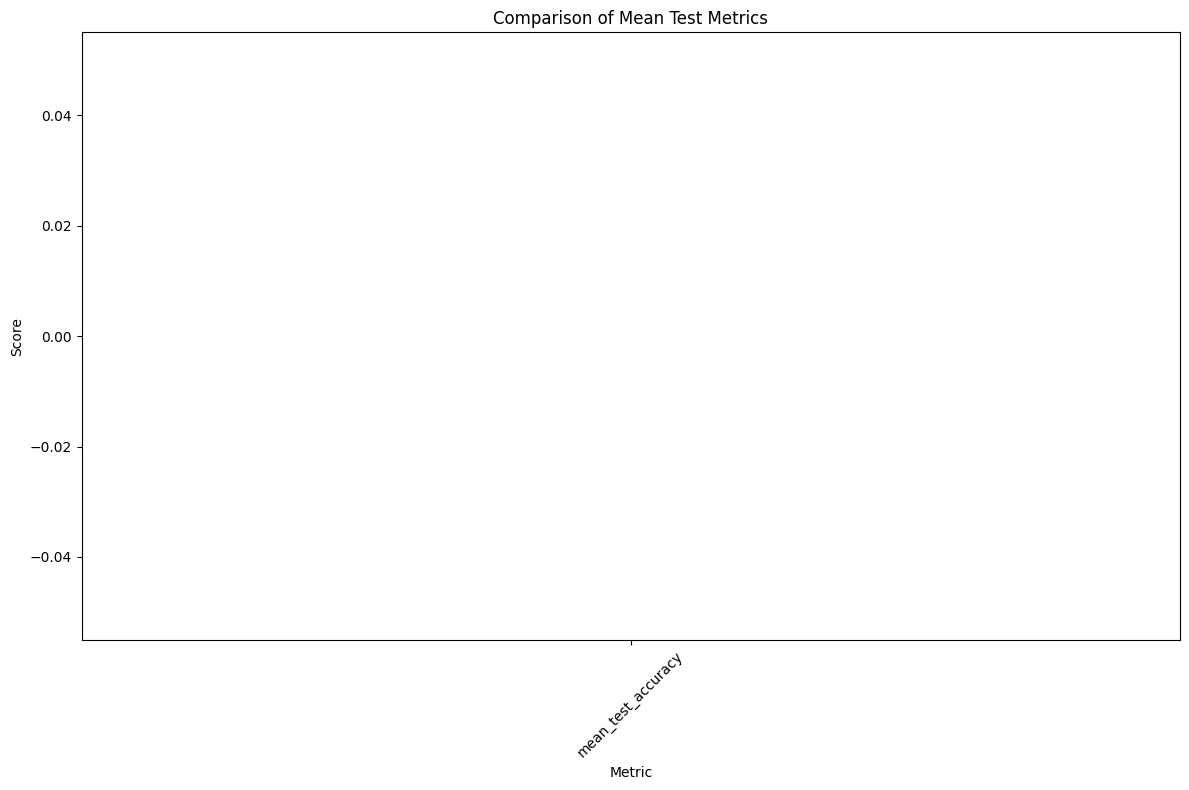

In [75]:
view_test_metrics(False, 10, results)